<a href="https://colab.research.google.com/github/surajbhala/Time-Series-Forecasting/blob/main/Time_Series_ARIMA_Fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting using ARIMA and FBProphet


In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/UpgradTimeSeries/car-sales.csv')
data.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [4]:
## . Demo on strptime function
day = datetime.strptime('february/1-2019','%B/%d-%Y')
print(day)
print(day.month)

2019-02-01 00:00:00
2


In [5]:
newdate = 'Jan-19-22'
print(datetime.strptime(newdate,'%b-%y-%d'))

2019-01-22 00:00:00


In [6]:
data.head(1)

,Month,Sales
0,2016-01,266


In [9]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('/content/drive/MyDrive/UpgradTimeSeries/car-sales.csv',index_col=0, parse_dates=[0] ,
                    date_parser=parser)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


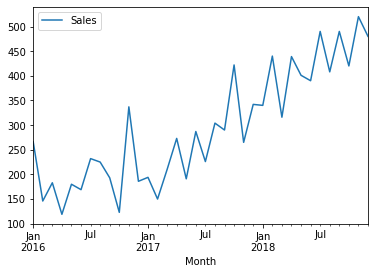

In [10]:
sales.plot();

Stationary means mean, variance and covariance is constant over periods.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


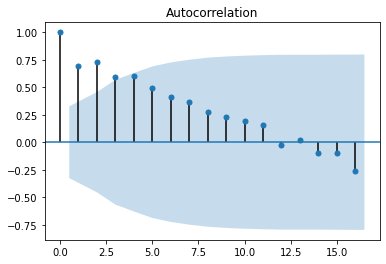

In [11]:
#ACF -> Auto Colleration Function 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)
plt.show()

### Converting series to stationary

In [12]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [13]:
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [14]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [15]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [16]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


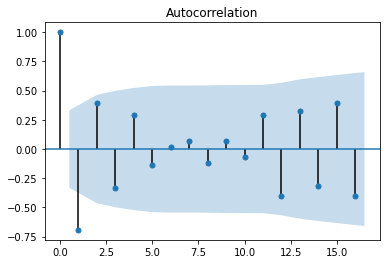

In [17]:
plot_acf(sales_diff)
plt.show()

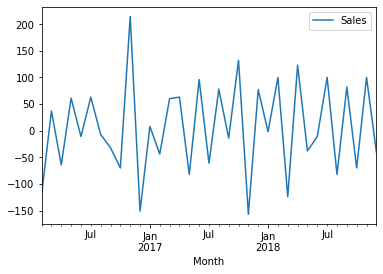

In [18]:
sales_diff.plot()

In [19]:
X = sales.values.astype('float')
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [20]:
train.size

27

# ARIMA model

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
from sklearn.metrics import mean_squared_error
import numpy as np
model_arima = ARIMA(train,order=(4,1,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

296.64552471466544


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [23]:
model_arima_fit.forecast(steps=10)
### forecastndarray : Array of out of sample forecasts
### stderrndarray : Array of the standard error of the forecasts.
### conf_intndarray : 2d array of the confidence interval for the forecast

(array([385.99892445, 333.08806482, 419.6909503 , 391.4749745 ,
        411.06445711, 376.40345598, 413.75952378, 425.02158877,
        445.64986065, 425.79590584]),
 array([44.85076502, 47.00958127, 53.81989661, 54.91130967, 65.71616525,
        66.24132262, 67.70448798, 68.23957565, 73.32990323, 76.1759795 ]),
 array([[298.09304033, 473.90480857],
        [240.9509786 , 425.22515103],
        [314.2058913 , 525.17600931],
        [283.8507852 , 499.0991638 ],
        [282.26314002, 539.86577419],
        [246.57284936, 506.2340626 ],
        [281.06116574, 546.45788181],
        [291.27447817, 558.76869937],
        [301.92589133, 589.37382996],
        [276.49372954, 575.09808214]]))

In [24]:
model_arima_fit.forecast(steps=10)[0]

array([385.99892445, 333.08806482, 419.6909503 , 391.4749745 ,
       411.06445711, 376.40345598, 413.75952378, 425.02158877,
       445.64986065, 425.79590584])

In [25]:
predictions= model_arima_fit.forecast(steps=13)[0]
predictions
print(np.sqrt(mean_squared_error(test,predictions[0:10])))

61.6455430272913


### The error of 61.64 is very huge considering the car prices can vary by 60units which is certainly not acceptance, hence we will resolve it using fbprophet

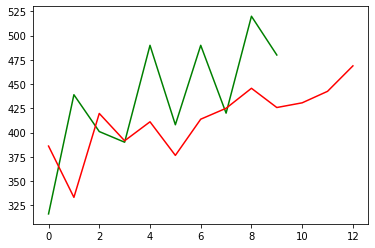

In [26]:
plt.plot(test, color='green')
plt.plot(predictions,color='red')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(test, predictions[0:10]))

61.6455430272913

In [29]:
predictions

array([385.99892445, 333.08806482, 419.6909503 , 391.4749745 ,
       411.06445711, 376.40345598, 413.75952378, 425.02158877,
       445.64986065, 425.79590584, 430.65368186, 442.51408433,
       468.78536413])

# FB Prophet


## FB prophet documentation : https://facebook.github.io/prophet/docs/quick_start.html


In [30]:
# installing prophet
!pip install prophet

     |████████████████████████████████| 71kB 3.1MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 184kB 7.6MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6640021 sha256=b6db9c6461e90acb67f3f56bc4ae6c8e57bf5441bbaa92c24a025f31dfafaa50
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [31]:
from prophet import Prophet

In [47]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('/content/drive/MyDrive/UpgradTimeSeries/car-sales.csv',index_col=0, parse_dates=[0] ,
                    date_parser=parser)
sales.head(40)

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


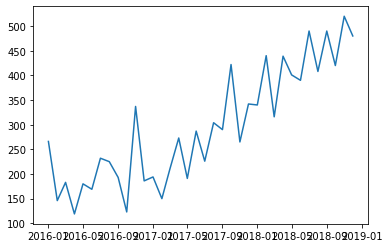

In [48]:
plt.plot(sales)

In [49]:
date = list(sales.index)
sales = sales.Sales
dataFrame = pd.DataFrame(
    list(zip(date,sales)),
    columns = ['ds', 'y']
)

In [50]:
dataFrame.shape

(36, 2)

In [51]:
dataTrain = dataFrame.iloc[0:30,:]
dataReal = dataFrame.iloc[30:,:]

In [52]:
dataTrain.tail()

,ds,y
25,2018-02-01,440
26,2018-03-01,316
27,2018-04-01,439
28,2018-05-01,401
29,2018-06-01,390


In [53]:
print(dataTrain.shape, dataReal.shape)

(30, 2) (6, 2)


In [54]:
future = dataFrame[['ds']]

In [55]:
future.tail()

,ds
31,2018-08-01
32,2018-09-01
33,2018-10-01
34,2018-11-01
35,2018-12-01


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


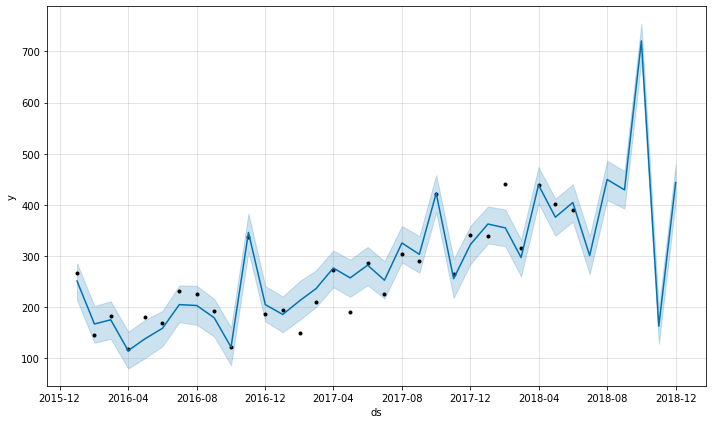

In [56]:
m = Prophet().fit(dataTrain)
fcst = m.predict(future)
fig = m.plot(fcst)
# black dot is real data and blue line is prediction

In [57]:
list(fcst['yhat_lower'].tail(6).values)

[264.72170317063495,
 409.72405587376716,
 392.78906809649715,
 683.1037312296678,
 128.23875778389737,
 405.91783214027413]

In [58]:
list(fcst['yhat_upper'].tail(6).values)

[338.27307253111496,
 486.2901008063101,
 466.08826570227535,
 754.2923559273283,
 197.89380761387258,
 480.311665057589]

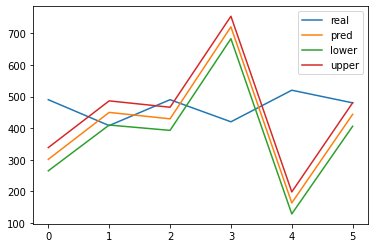

In [59]:
plt.plot(dataReal.tail(6).y.values, label = 'real')
plt.plot(fcst['yhat'].tail(6).values, label = 'pred')
plt.plot(fcst['yhat_lower'].tail(6).values, label = 'lower')
plt.plot(fcst['yhat_upper'].tail(6).values, label = 'upper')
plt.legend()

In [60]:
fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
31,2018-08-01,427.754558,409.724056,486.290101,427.752977,427.756274,21.964323,21.964323,21.964323,21.964323,21.964323,21.964323,0.0,0.0,0.0,449.718881
32,2018-09-01,437.684601,392.789068,466.088266,437.681411,437.688073,-8.255008,-8.255008,-8.255008,-8.255008,-8.255008,-8.255008,0.0,0.0,0.0,429.429593
33,2018-10-01,447.294320,683.103731,754.292356,447.289377,447.299645,273.341179,273.341179,273.341179,273.341179,273.341179,273.341179,0.0,0.0,0.0,720.635499
34,2018-11-01,457.224363,128.238758,197.893808,457.216987,457.231811,-294.112746,-294.112746,-294.112746,-294.112746,-294.112746,-294.112746,0.0,0.0,0.0,163.111618
35,2018-12-01,466.834082,405.917832,480.311665,466.823972,466.843753,-23.117860,-23.117860,-23.117860,-23.117860,-23.117860,-23.117860,0.0,0.0,0.0,443.716223


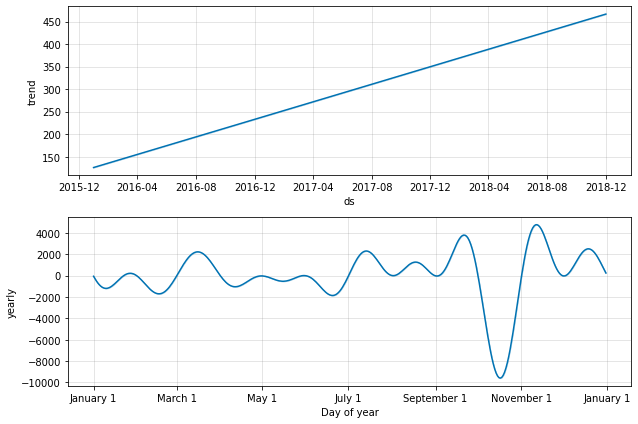

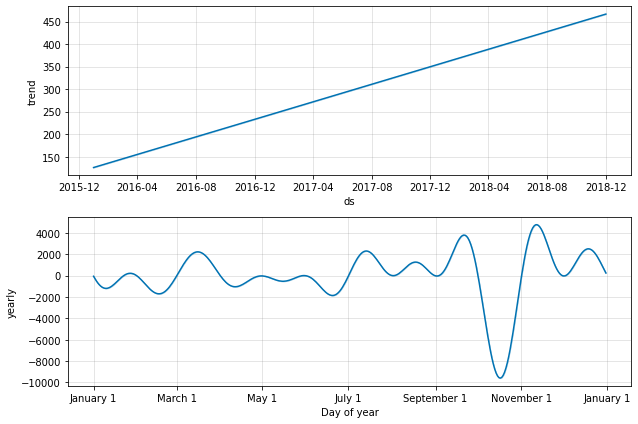

In [61]:
m.plot_components(fcst)